<a href="https://colab.research.google.com/github/erinjsoto/capstone_recommendation_system/blob/main/ErinSoto_Reference_Notebook_Milestone_1_Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

In [ ]:
#%%shell
#jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/spotify_music/Reference_Notebook_Milestone_1_Recommendation_Systems_%282%29+%281%29.ipynb

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

# To do label encoding
from sklearn.preprocessing import LabelEncoder

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/spotify_music/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/spotify_music/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
# Top 10 records based on play_count column
count_df.sort_values(by=['play_count'], ascending=False).head(10)

,Unnamed: 0,user_id,song_id,play_count
1228366,1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213
1048310,1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1586780,1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
31179,31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1875121,1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
1644909,1644909,70caceccaa745b6f7bc2898a154538eb1ada4d5a,SOPREHY12AB01815F9,676
1731945,1731945,972cce803aa7beceaa7d0039e4c7c0ff097e4d55,SOJRFWQ12AB0183582,664
1374693,1374693,d2232ac7a1ec17b283b5dff243161902b2cb706c,SOLGIWB12A58A77A05,649
1819571,1819571,f5363481018dc87e8b06f9451e99804610a594fa,SOVRIPE12A6D4FEA19,605
515442,515442,f1bdbb9fb7399b402a09fa124210dedf78e76034,SOZPMJT12AAF3B40D1,585


In [ ]:
# See 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
# Testing
song_df.groupby(['song_id']).count().sum()

title           999985
release         999995
artist_name    1000000
year           1000000
dtype: int64

In [ ]:
# See top 10 records of song_df data
a = song_df['song_id'].value_counts()
a.head(10)

SOUYQYY12AF72A000F    3
SOKUAGP12A8C133B94    3
SOFQIZF12A67ADE730    3
SOBPICV12A8151CDF1    3
SORBGBD12A8C141CEA    3
SONBEKD12AB01894DC    3
SOBPAEP12A58A77F49    3
SOUWROC12A8C141CF3    3
SOQNMCD12A8C1383D4    3
SOODBWM12A6D4F6B0E    3
Name: song_id, dtype: int64

In [ ]:
# See top 10 artists of song_df data
a = song_df['artist_name'].value_counts()
a.head(10)

Michael Jackson       194
Johnny Cash           193
Beastie Boys          187
Joan Baez             181
Neil Diamond          176
Duran Duran           175
Radiohead             173
Franz Ferdinand       173
Aerosmith             173
The Rolling Stones    171
Name: artist_name, dtype: int64

### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

*   Currently there are two different data sets (song_df and count_df)
*   song_df contains data related to songs such as release year, artist, album, etc. 
*   count_df contains data related to the users such as user id, and play_count
*   Both datasets have a song_id column
*   Both datasets have object and int data types
*   It appears that within song_df there is some missing data regarding title and release

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
#df = count_df.merge(song_df.drop_duplicates(['song_id']), how="left", on="song_id")
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df.head()
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis=1)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Label Encoding
le = LabelEncoder()

# Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

# Fit transform the business_id column
df['business_id'] = le.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by at least 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
#df_final.drop(df_final[df_final['play_count']>5].index, inplace=True)
df_final.drop(df_final.index[df_final['play_count'] > 5], inplace = True)

In [ ]:
# Check the shape of the pre narrowed down dataset to compare to the narrowed down df_final
df.shape

(438390, 8)

In [ ]:
# Check the shape of the narrowed down data
df_final.shape

(117876, 8)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print("Total number of unique user_ids:", df_final.user_id.nunique())

Total number of unique user_ids: 3155


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print("Total number of unique song_ids:", df_final.song_id.nunique())

Total number of unique song_ids: 563


Total number of unique artists

In [ ]:
# Display total number of unique artists
print("Total number of unique artists:",df_final.artist_name.nunique())

Total number of unique artists: 232


#### **Observations and Insights:**


*   The total number of unique users are 3155
*   The total number of unique songs are 563
*   The total number of Unique artists are 232
*   After narrowing down the dataset to df_final we can see that the dataset went from 438390 rows and 8 columns to 117876 rows and 8 columns
*   To narrow the data only users who have listened to 90 or more songs were kept int the df_final dataset. Any song that had not been listened to at least 120 times was also removed. 

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Finding the most played songs in the dataset
df_final['song_id'].value_counts().head(10)

SOWCKVR12A8C142411    751
SOAXGDH12A8C13F8A1    748
SOFRQTD12A81C233C0    713
SOCVTLJ12A6310F0FD    662
SOKLRPJ12A8C13C3FE    652
SONYKOW12AB01849C9    618
SOLFXKT12AB017E3E0    609
SOPQLBY12A6310E992    606
SOPXKYD12A6D4FA876    583
SODJWHY12A8C142CCE    570
Name: song_id, dtype: int64

In [ ]:
# See top 10 artists of df_final data
df_final['artist_name'].value_counts().head()

Coldplay                  5317
The Killers               4128
Florence + The Machine    2896
Kings Of Leon             2864
the bird and the bee      2387
Name: artist_name, dtype: int64

In [ ]:
# Display some songs by the most popular artist_name
df_final.loc[df_final['artist_name'] == 'Coldplay']

,user_id,song_id,play_count,title,release,artist_name,year,business_id
396,27018,SOCVTLJ12A6310F0FD,2,Clocks,A Rush Of Blood To The Head,Coldplay,2002,1118
428,27018,SOEWTBE12A58A7E7C2,2,Strawberry Swing,Viva La Vida - Prospekt's March Edition,Coldplay,2008,1907
433,27018,SOFBOXR12A6310F0FC,2,God Put A Smile Upon Your Face,A Rush Of Blood To The Head,Coldplay,2002,1983
439,27018,SOFPZCI12A58A7CF79,2,Brothers & Sisters,Trouble (B-Side),Coldplay,1999,2187
473,27018,SOICNON12A8C140437,2,Life In Technicolor ii,Viva La Vida - Prospekt's March Edition,Coldplay,2008,3232
...,...,...,...,...,...,...,...,...
1994217,30647,SOWEJXA12A6701C574,2,Fix You,X & Y,Coldplay,2005,8612
1995068,9570,SOCVTLJ12A6310F0FD,3,Clocks,A Rush Of Blood To The Head,Coldplay,2002,1118
1995179,9570,SOKLRPJ12A8C13C3FE,1,The Scientist,The Scientist,Coldplay,2002,4152
1995272,9570,SOPXKYD12A6D4FA876,4,Yellow,Yellow,Coldplay,2000,6293


Most interacted users

In [ ]:
# Finding the most played songs in the dataset
df_final['user_id'].value_counts().head(10)

61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
26616    175
9097     175
43041    174
65994    171
Name: user_id, dtype: int64

In [ ]:
df_final.to_csv(r'/content/drive/MyDrive/Colab_Notebooks/spotify_music/my_data.csv', index=False)

#### **Observations and Insights:**


*   The most intereacted song id is SOWCKVR12A8C142411 being played 751 times
*   The most interacted user id is 61472






Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


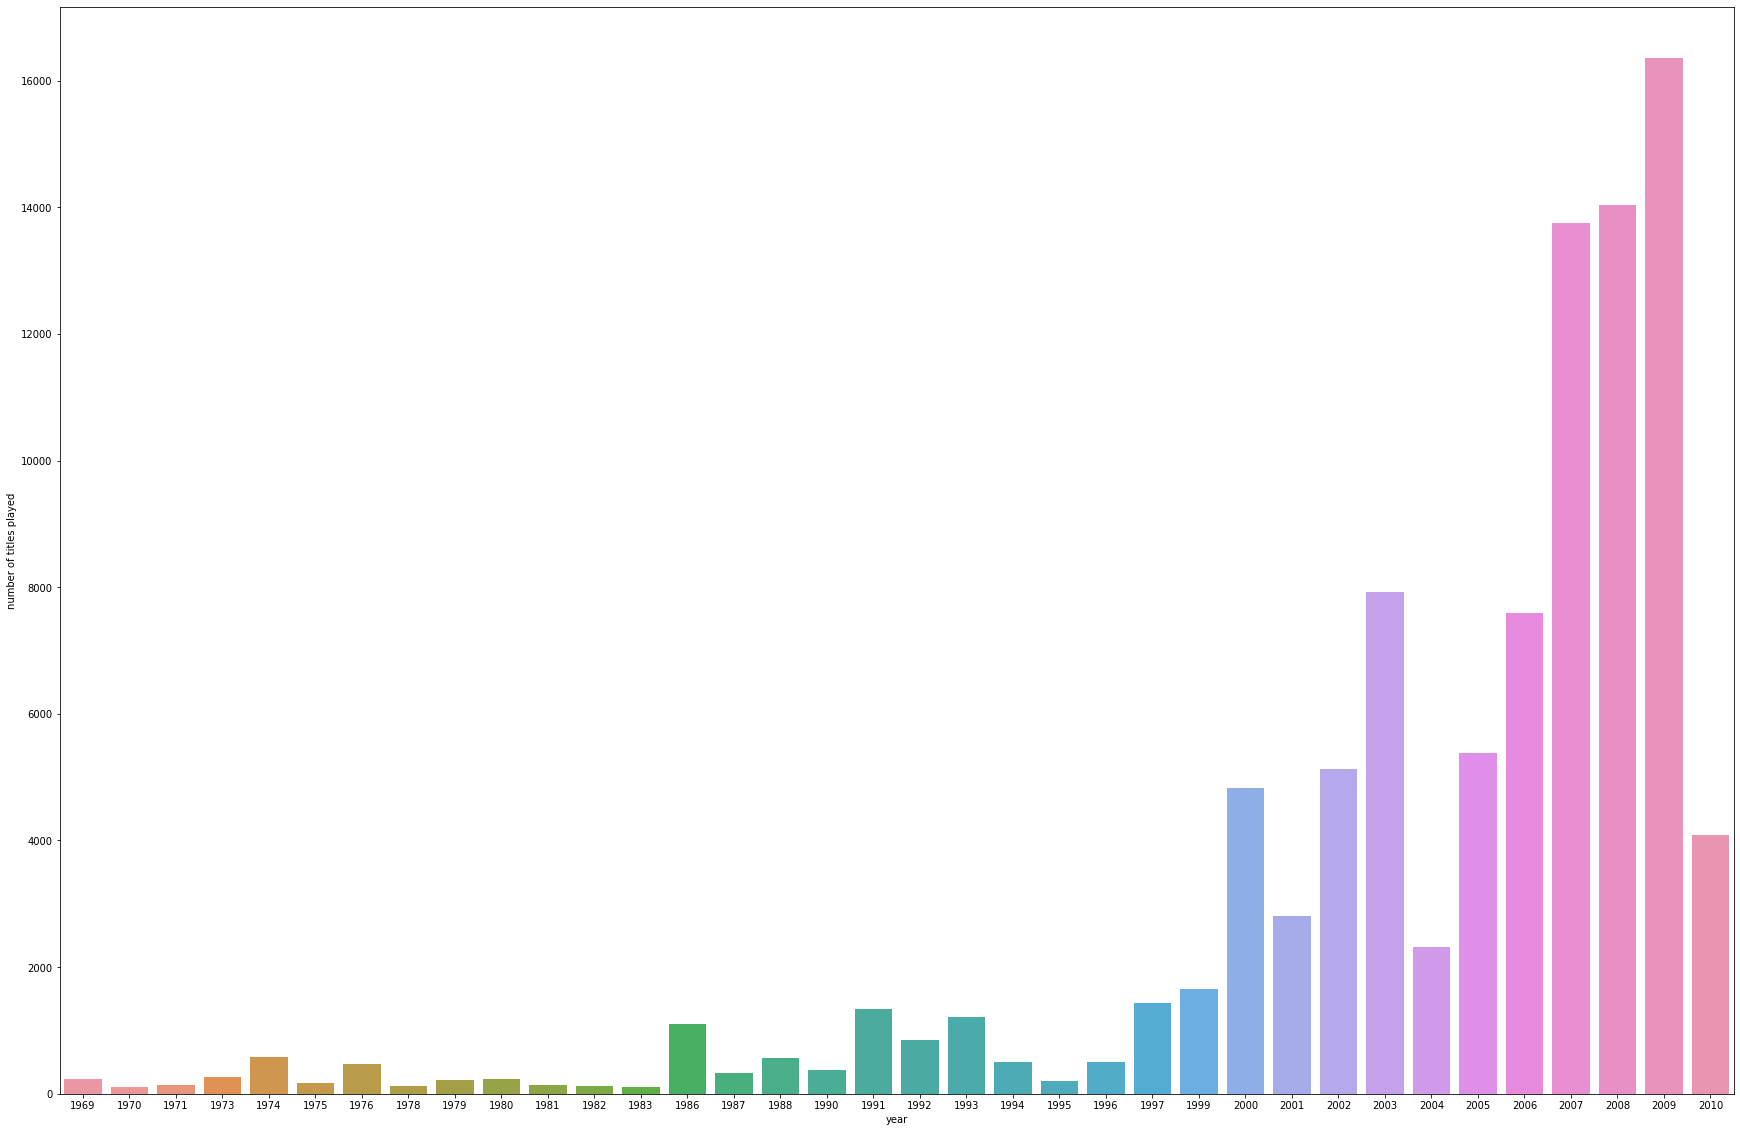

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 20))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** 

*   The year with the most amount of song played is 2009 with 16351 counted songs
*   There is a correlation between the more popular songs with the year they came out. 
*   You can see a significant increase in songs listened to per year starting around 2000. This indicates the users who are listening to music are listening to more recent music compared to music that came out prior to 2000
*   It would be interesting to see the user_ids age, I believe the reason there is a spike starting around 2000 might be because users who are more familir with technology are younger and more tech savy compared to older generations. Threfore, the users are more likely to listen to recent music compared music released in older years.

**Think About It:** What other insights can be drawn using exploratory data analysis?

-   Problem Definition

    -   The context - Why is this problem important to solve?

        -   Spotify is a digital music platform that provides 70 million
            songs to its premium users. One of the largest advantages of
            containing such a large database is the ability to provide
            song recommendations. With a recommendation system, Spotify
            can provide a recommendation of liked songs based on the
            user's previously listed songs. Why is a recommendation
            system important in this context? It enhances user
            experience, and the ability to bring a user alternative
            suggestion based on the previous song usage can keep user
            loyalty and provide a fit-for-purpose experience.

    -   The objectives - What is the intended goal?

        -   The objective of this project is to provide a list of top
            recommended songs based on fields such as play_count to
            understand what the user would be interested in listening
            to.

    -   The key questions - What are the key questions that need to be
        answered?

        -   Some key questions that need to be answered do we have
            enough data to create a model out of this? Is our data
            structured? Does the data make sense? What does my data look
            like by utilizing .info()? Understanding the dataset and
            what values are in place is important to understand how to
            create the appropriate model. Implementing logic to help
            provide a stronger recommendation would require asking
            questions such as "is the column of data relevant to answer
            my recommendation" i.e., a year a song was released,
            depending on the model it could be yes or no.

    -   The problem formulation - What is that we are trying to solve
        using data science?

        -   Using data science, we are trying to solve what a good song
            recommendation for a specific user_id would be based on the
            previous song listens.

-   Data Exploration/Data Description

    -   What is the background of this data? What does it contain?

        -   Understanding the data is crucial to constructing the
            appropriate model. Utilizing items such as .head(), .info(),
            .describe(), and .nunique() help me better understand the
            background of the Spotify dataset. The data provided
            contained two datasets that were related to Spotify user
            information. This data was eventually merged on song_id.
            Count_df dataset contained user information such as user_id,
            song_id, and play_count. Song_df dataset contained song
            information such as song_id, song title, release,
            artist_name, and year.

-   Observations & Insights

    -   What are some key patterns in the data?

        -   Some key patterns in the data were the release years that
            most interacted songs came out. I noticed that the most
            popular song released years were in 2009 once the dataset
            was narrowed down.

    -   What does it mean for the problem formulation?

        -   

    -   Are there any data treatments or pre-processing required?

        -   For the data we want to make sure that there are no null
            values, or at least no copious amounts of missing data. To
            clean the data and remove useless values we will use .drop.

-   Proposed approach

    -   Potential techniques - What different techniques should be
        explored?

        -   Some potential techniques for a recommendation could be
            Popularity-based focusing on popular song trends,
            Collaborative filtering receiving insights based on
            user-user or item-item collaboration, or matrix
            factorization for more scalability.

    -   Overall solution design - What is the potential solution design?

        -   The solution design is to provide recommendations based on
            user-specific data, trend data, etc. We want the
            recommendation model to be accurate in what it is suggesting
            that users continue to use the Spotify platform.

    -   Measures of success - What are the key measures of success?

        -   Key measures of success would first be a working model, then
            utilizing measurements such as F_1 score to determine the
            precision and recall optimization of a recommendation being
            useful. Other metrics include Precision, Recall, and RMSE.
            Utilizing recall and precision analysis will help determine
            if the model is working appropriately. Tuning
            hyperparameters for the KNNBasic algorithms helps infer more
            precise and accurate recommendations/predictions. Ideally,
            we would look for a high F_1 score in our testing.
